# 1. Gather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df2=pd.read_table('image-predictions.tsv')

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10000)
pd.options.display.max_colwidth=1000

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
df2.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [7]:
import tweepy
import csv

from tweepy import OAuthHandler
import json
from timeit import default_timer as timer



consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
# Obtain tweet by API
'''
id_name='dog_rates'
tweet_data = {}
tweet_id = []
retweet_count = []
favorite_count = []
ID = df1['tweet_id']

for IDs in ID:
    try: 
        tweet = api.get_status(IDs)
        tweet_id.append(tweet.id) 
        retweet_count.append(tweet.retweet_count) 
        favorite_count.append(tweet.favorite_count) 

    except tweepy.TweepError:
        pass

tweet_data['tweet_id']=tweet_id
tweet_data['retweet_count']=retweet_count
tweet_data['favorite_count']=favorite_count

with open('tweet_json.txt','w') as f:
    json.dump(tweet_data, f)
'''

"\nid_name='dog_rates'\ntweet_data = {}\ntweet_id = []\nretweet_count = []\nfavorite_count = []\nID = df1['tweet_id']\n\nfor IDs in ID:\n    try: \n        tweet = api.get_status(IDs)\n        tweet_id.append(tweet.id) \n        retweet_count.append(tweet.retweet_count) \n        favorite_count.append(tweet.favorite_count) \n\n    except tweepy.TweepError:\n        pass\n\ntweet_data['tweet_id']=tweet_id\ntweet_data['retweet_count']=retweet_count\ntweet_data['favorite_count']=favorite_count\n\nwith open('tweet_json.txt','w') as f:\n    json.dump(tweet_data, f)\n"

In [9]:
tweet_json=pd.read_json('tweet_json.txt')
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id          2328 non-null int64
retweet_count     2328 non-null int64
favorite_count    2328 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [10]:
df1_merge = df1.merge(tweet_json, on = 'tweet_id')
tweet_data = df1_merge.merge(df2, on = 'tweet_id')

# 2. Assess

In [11]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 30 columns):
tweet_id                      2058 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2058 non-null object
source                        2058 non-null object
text                          2058 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2058 non-null object
rating_numerator              2058 non-null int64
rating_denominator            2058 non-null int64
name                          2058 non-null object
doggo                         2058 non-null object
floofer                       2058 non-null object
pupper                        2058 non-null object
puppo                         2058 non-null object
retweet_count                 2058 

>### Quality Issue 1  (QI 1)
'tweet_id' is int. This should be object.

>### Quality Issue 2 (QI 2)
'timestamp' is object. This should be datetime.


In [12]:
tweet_data

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888078434458587136                    NaN                  NaN   
20    887705289381826560                    NaN                  NaN   
21    887517139158093824                    NaN                  NaN   
22    887473957103951883                    NaN                  NaN   
23    887343217045368832                    NaN                  NaN   
24    887101392804085760                    NaN                  NaN   
25    886983233522544640                    NaN                  NaN   
26    886736880519319552                    NaN                  NaN   
27    886680336477933568                    NaN                  NaN   
28    886366144734445568                    NaN                  NaN   
29    886258384151887873                    NaN                  NaN   
30    885984800019947520                    NaN                  NaN   
31    885528943205470208                    NaN                  NaN   
32    885311592912609280                    NaN                  NaN   
33    885167619883638784                    NaN                  NaN   
34    884925521741709313                    NaN                  NaN   
35    884876753390489601                    NaN                  NaN   
36    884562892145688576                    NaN                  NaN   
37    884441805382717440                    NaN                  NaN   
38    884162670584377345                    NaN                  NaN   
39    883838122936631299                    NaN                  NaN   
40    883482846933004288                    NaN                  NaN   
41    883360690899218434                    NaN                  NaN   
42    883117836046086144                    NaN                  NaN   
43    882992080364220416                    NaN                  NaN   
44    882762694511734784                    NaN                  NaN   
45    882627270321602560                    NaN                  NaN   
46    882268110199369728                    NaN                  NaN   
47    882045870035918850                    NaN                  NaN   
48    881906580714921986                    NaN                  NaN   
49    881666595344535552                    NaN                  NaN   
50    881536004380872706                    NaN                  NaN   
51    881268444196462592                    NaN                  NaN   
52    880935762899988482                    NaN                  NaN   
53    880872448815771648                    NaN                  NaN   
54    880465832366813184                    NaN         

>### Quality Issue 3 (QI 3)
Some of 'expanded_urls' contain duplicated URL.

>### Quality Issue 4 (QI 4)
'p1_dog', 'p2_dog' and 'p3_dog' contain False. Only True field should be used.


>### Tidiness Issue 1 (TI 1)
From 'p1' to 'p3_dog', these columns should be combined in a single column.

>### Tidiness Issue 2 (TI 2)
Dog stage should be combined in a single column.

In [13]:
tweet_data[tweet_data['in_reply_to_status_id'].notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
121   863079547188785154           6.671522e+17         4.196984e+09   
149   856526610513747968           8.558181e+17         4.196984e+09   
197   844979544864018432           7.590995e+17         4.196984e+09   
448   802265048156610565           7.331095e+17         4.196984e+09   
818   746906459439529985           7.468859e+17         4.196984e+09   
820   746818907684614144           6.914169e+17         4.196984e+09   
917   729838605770891264           7.291135e+17         4.196984e+09   
1098  705786532653883392           7.032559e+17         4.196984e+09   
1107  704871453724954624           6.671522e+17         4.196984e+09   
1122  703425003149250560           7.030419e+17         4.196984e+09   
1208  695767669421768709           6.753494e+17         4.196984e+09   
1219  694356675654983680           6.706684e+17         4.196984e+09   
1250  692142790915014657           6.920419e+17         4.196984e+09   
1361  684538444857667585           6.844811e+17         4.196984e+09   
1365  684225744407494656           6.842229e+17         4.196984e+09   
1555  675870721063669760           6.757073e+17         4.196984e+09   
1564  675707330206547968           6.754971e+17         4.196984e+09   
1578  675349384339542016           6.749998e+17         4.196984e+09   
1594  674999807681908736           6.747934e+17         4.196984e+09   
1597  674793399141146624           6.717299e+17         4.196984e+09   
1604  674754018082705410           6.747522e+17         4.196984e+09   
1743  671729906628341761           6.715610e+17         4.196984e+09   
1874  669353438988365824           6.678065e+17         4.196984e+09   

                      timestamp  \
121   2017-05-12 17:12:53 +0000   
149   2017-04-24 15:13:52 +0000   
197   2017-03-23 18:29:57 +0000   
448   2016-11-25 21:37:47 +0000   
818   2016-06-26 03:22:31 +0000   
820   2016-06-25 21:34:37 +0000   
917   2016-05-10 01:00:58 +0000   
1098  2016-03-04 16:06:36 +0000   
1107  2016-03-02 03:30:25 +0000   
1122  2016-02-27 03:42:44 +0000   
1208  2016-02-06 00:35:13 +0000   
1219  2016-02-02 03:08:26 +0000   
1250  2016-01-27 00:31:15 +0000   
1361  2016-01-06 00:54:18 +0000   
1365  2016-01-05 04:11:44 +0000   
1555  2015-12-13 02:51:51 +0000   
1564  2015-12-12 16:02:36 +0000   
1578  2015-12-11 16:20:15 +0000   
1594  2015-12-10 17:11:09 +0000   
1597  2015-12-10 03:30:58 +0000   
1604  2015-12-10 00:54:28 +0000   
1743  2015-12-01 16:37:44 +0000   
1874  2015-11-25 03:14:30 +0000   

                                                                                  source  \
121   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
149   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
197   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
448   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
818   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
820   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
917   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1098  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1107  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1122  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1208  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1219  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1250  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1361  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1365  <a href="http://twitter.com/download/iphone" rel="nofollow">

>### Quality Issue 5 (QI 5)
There are some reply tweets. These should be removed.

In [14]:
tweet_data[tweet_data['retweeted_status_id'].notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
32    885311592912609280                    NaN                  NaN   
67    877611172832227328                    NaN                  NaN   
107   867072653475098625                    NaN                  NaN   
130   860924035999428608                    NaN                  NaN   
167   851861385021730816                    NaN                  NaN   
182   847971574464610304                    NaN                  NaN   
209   841833993020538882                    NaN                  NaN   
220   839290600511926273                    NaN                  NaN   
223   838916489579200512                    NaN                  NaN   
255   832769181346996225                    NaN                  NaN   
261   832215726631055365                    NaN                  NaN   
262   832040443403784192                    NaN                  NaN   
276   829878982036299777                    NaN                  NaN   
309   824796380199809024                    NaN                  NaN   
318   823269594223824897                    NaN                  NaN   
322   822647212903690241                    NaN                  NaN   
328   821813639212650496                    NaN                  NaN   
337   820446719150292993                    NaN                  NaN   
346   819015337530290176                    NaN                  NaN   
347   819015331746349057                    NaN                  NaN   
352   818588835076603904                    NaN                  NaN   
361   817181837579653120                    NaN                  NaN   
365   816829038950027264                    NaN                  NaN   
371   816014286006976512                    NaN                  NaN   
381   813944609378369540                    NaN                  NaN   
412   809808892968534016                    NaN                  NaN   
419   808134635716833280                    NaN                  NaN   
424   807059379405148160                    NaN                  NaN   
428   806242860592926720                    NaN                  NaN   
430   805958939288408065                    NaN                  NaN   
437   804413760345620481                    NaN                  NaN   
440   803692223237865472                    NaN                  NaN   
445   802624713319034886                    NaN                  NaN   
458   800443802682937345                    NaN                  NaN   
462   799774291445383169                    NaN                  NaN   
469   798697898615730177                    NaN                  NaN   
470   798694562394996736                    NaN                  NaN   
471   798673117451325440                    NaN                  NaN   
472   798665375516884993                    NaN                  NaN   
473   798644042770751489                    NaN                  NaN   
474   798628517273620480                    NaN                  NaN   
475   798340744599797760                    NaN                  NaN   
484   796177847564038144                    NaN                  NaN   
492   794983741416415232                    NaN                  NaN   
494   794355576146903043                    NaN                  NaN   
499   793614319594401792                    NaN                  NaN   
522   791026214425268224                    NaN                  NaN   
525   790723298204217344                    NaN                  NaN   
541   788070120937619456                    NaN                  NaN   
553   786036967502913536                    NaN                  NaN   
568   783347506784731136                    NaN                  NaN   
576   782021823840026624                    NaN                  NaN   
587   780496263422808064                    NaN                  NaN   
588   780476555013349377                    NaN                  NaN   
599   778396591732486144                    NaN         

>### Quality Issue 6 (QI 6)
There are some retweets. These should be removed.

In [15]:
tweet_data['rating_numerator'].value_counts()

12      471
10      426
11      413
13      275
9       151
8        95
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
0         2
80        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

>### Quality Issue 7 (QI 7)
'rating_numerator' column contains abnormally large figure. 

In [16]:
tweet_data['rating_denominator'].value_counts()

10     2040
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

>### Quality Issue 8 (QI 8)
'rating_denominator' column contains abnormally large figure. 

# 3. Clean

### Create copy

In [17]:
copy_tweet_data=tweet_data.copy()

### Define QI 1
Change to object

>### Code QI 1

In [18]:
tweet_data['tweet_id'] = tweet_data['tweet_id'].astype('object')

### Define QI 2
Change to datetime

>### Code QI 2

In [19]:
tweet_data['timestamp'] = tweet_data['timestamp'].astype('datetime64')

>### Test QI 1 & QI 2

In [20]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 30 columns):
tweet_id                      2058 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2058 non-null datetime64[ns]
source                        2058 non-null object
text                          2058 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2058 non-null object
rating_numerator              2058 non-null int64
rating_denominator            2058 non-null int64
name                          2058 non-null object
doggo                         2058 non-null object
floofer                       2058 non-null object
pupper                        2058 non-null object
puppo                         2058 non-null object
retweet_count             

### Define QI 3
Drop duplication of URL

>### Code QI 3

In [21]:
tweet_data['expanded_urls']=tweet_data['expanded_urls'].str.split(',', expand=True)[0]

>### Test QI 3

In [22]:
tweet_data['expanded_urls']

0                                                                                                                                https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                                                                                https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                                                                                https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                                                                                https://twitter.com/dog_rates/status/891689557279858688/photo/1
4                                                                                                                                https://twitter.com/dog_rates/status/891327558926688256/photo/1
5                                  

### Define QI 4
Change 'p1_conf' to zero if 'p1_dog' is False (same applies to p2 and p3)

>### Code QI 4

In [23]:
tweet_data['p1_conf']=np.where(tweet_data['p1_dog']==True,tweet_data['p1_conf'],0)
tweet_data['p2_conf']=np.where(tweet_data['p2_dog']==True,tweet_data['p2_conf'],0)
tweet_data['p3_conf']=np.where(tweet_data['p3_dog']==True,tweet_data['p3_conf'],0)

>### Test QI 4

In [24]:
tweet_data[['p1_conf','p2_conf','p3_conf']].head()

p1_conf   p2_conf   p3_conf
0  0.000000  0.000000  0.000000
1  0.323581  0.090647  0.068957
2  0.716012  0.078253  0.031379
3  0.000000  0.168086  0.000000
4  0.555712  0.225770  0.175219

### Define TI 1
Combine 'p1' to 'p3' into a single column (same applies to 'p1_conf' to 'p3_conf') by choosing the highest confident value and its breed among them

> ### Code TI 1

In [25]:
#Create lists to contain the highest confident value and its breed
max_confidence = []
confident_breed = []
for i in range(len(tweet_data)):
    confidence=tweet_data.loc[i,['p1_conf','p2_conf','p3_conf']]
    breed=tweet_data.loc[i,['p1','p2','p3']]
    if confidence[0] + confidence[1] + confidence[2] == 0:
        max_confidence.append(None)
        confident_breed.append(None)
    elif confidence[0] > confidence[1]:
        if confidence[0] > confidence[2]:
            max_confidence.append(confidence[0])
            confident_breed.append(breed[0])
        else:
            max_confidence.append(confidence[2])
            confident_breed.append(breed[2])
    else:
        if confidence[1] > confidence[2]:
            max_confidence.append(confidence[1])
            confident_breed.append(breed[1])
        else:
            max_confidence.append(confidence[2])
            confident_breed.append(breed[2])

In [26]:
#create new columns
tweet_data['dog_breed']=confident_breed
tweet_data['confidence']=max_confidence

>### Test TI 1

In [27]:
tweet_data[['p1_conf','p2_conf','p3_conf','confidence','p1','p2','p3','dog_breed']]

p1_conf   p2_conf   p3_conf  confidence  \
0     0.000000  0.000000  0.000000         NaN   
1     0.323581  0.090647  0.068957    0.323581   
2     0.716012  0.078253  0.031379    0.716012   
3     0.000000  0.168086  0.000000    0.168086   
4     0.555712  0.225770  0.175219    0.555712   
5     0.425595  0.116317  0.000000    0.425595   
6     0.341703  0.199287  0.000000    0.341703   
7     0.566142  0.178406  0.076507    0.566142   
8     0.487574  0.193054  0.118184    0.487574   
9     0.511319  0.451038  0.029248    0.511319   
10    0.957979  0.013884  0.008167    0.957979   
11    0.377417  0.151317  0.000000    0.377417   
12    0.966327  0.027356  0.004633    0.966327   
13    0.991650  0.002129  0.001498    0.991650   
14    0.953442  0.013834  0.007958    0.953442   
15    0.626152  0.194742  0.027351    0.626152   
16    0.714719  0.120184  0.105506    0.714719   
17    0.469760  0.184172  0.073482    0.469760   
18    0.700377  0.166511  0.111411    0.700377   
19    0.995026  0.000932  0.000903    0.995026   
20    0.821664  0.087582  0.026236    0.821664   
21    0.000000  0.000000  0.000000         NaN   
22    0.809197  0.054950  0.038915    0.809197   
23    0.330741  0.000000  0.134203    0.330741   
24    0.733942  0.035029  0.029705    0.733942   
25    0.793469  0.143528  0.000000    0.793469   
26    0.309706  0.186136  0.086346    0.309706   
27    0.000000  0.000000  0.000000         NaN   
28    0.999201  0.000361  0.000076    0.999201   
29    0.943575  0.000000  0.000000    0.943575   
30    0.972494  0.006630  0.006239    0.972494   
31    0.369275  0.265835  0.134697    0.369275   
32    0.908703  0.000000  0.011933    0.908703   
33    0.812482  0.071712  0.055770    0.812482   
34    0.259916  0.198451  0.127725    0.259916   
35    0.822103  0.106075  0.037348    0.822103   
36    0.546406  0.404291  0.044002    0.546406   
37    0.993225  0.003216  0.002081    0.993225   
38    0.707046  0.199396  0.049148    0.707046   
39    0.610946  0.299603  0.063020    0.610946   
40    0.943082  0.032409  0.005501    0.943082   
41    0.987997  0.007099  0.002140    0.987997   
42    0.949562  0.045948  0.002471    0.949562   
43    0.466778  0.406044  0.000000    0.466778   
44    0.850050  0.074257  0.015579    0.850050   
45    0.542982  0.251988  0.107699    0.542982   
46    0.762211  0.098985  0.017199    0.762211   
47    0.000000  0.000000  0.006941    0.006941   
48    0.291539  0.278966  0.000000    0.291539   
49    0.529012  0.250003  0.160739    0.529012   
50    0.281463  0.000000  0.000000    0.281463   
51    0.000000  0.000000  0.000000         NaN   
52    0.000000  0.000000  0.000000         NaN   
53    0.791416  0.061393  0.033726    0.791416   
54    0.913255  0.026329  0.009371    0.913255   
55    0.238525  0.000000  0.052580    0.238525   
56    0.120298  0.106395  0.106073    0.120298   
57    0.813507  0.146654  0.009485    0.813507   
58    0.479896  0.124353  0.000000    0.479896   
59    0.383404  0.134967  0.110481    0.383404   
60    0.000000  0.033496  0.018827    0.033496   
61    0.000000  0.000000  0.000000         NaN   
62    0.960513  0.009431  0.008711    0.960513   
63    0.734684  0.150487  0.039725    0.734684   
64    0.320420  0.215975  0.128507    0.320420   
65    0.839097  0.078799  0.015243    0.839097   
66    0.837956  0.062034  0.040599    0.837956   
67    0.364729  0.202907  0.107473    0.364729   
68    0.995368  0.001936  0.000000    0.995368   
69    0.509967  0.090497  0.079406    0.509967   
70    0.931120  0.068698  0.000082    0.931120   
71    0.575751  0.240970  0.088935    0.575751   
72    0.874566  0.037354  0.016724    0.874566   
73    0.534327  0.346312  0.094933    0.534327   
74    0.799551  0.179975  0.004618    0.799551   
75    0.245048  0.223716  0.000000    0.245048   
76    0.714319  0.091913  0.046038    0.714319   
77    0.836052  0.047069  0.036007    0.836052   
78    0.437216  0.277191  0.157402    0.437216   
79    0

In [28]:
#Remove unnecessary columns
tweet_data=tweet_data.drop(['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], axis=1)

### Define TI 2
Combine 'doggo' to 'puppo' columns into a single column

>### Code TI 2

In [29]:
dog_stage = []
for i in range(len(tweet_data)):
    four_stages=tweet_data.loc[i,['doggo','floofer','pupper','puppo']]
    if four_stages[0] != 'None':
        dog_stage.append(four_stages[0])
    elif four_stages[1] != 'None':
        dog_stage.append(four_stages[1])        
    elif four_stages[2] != 'None':
        dog_stage.append(four_stages[2])    
    elif four_stages[3] != 'None':
        dog_stage.append(four_stages[3])  
    else:
        dog_stage.append(None)
tweet_data['dog_stage']=dog_stage

>### Test TI 2

In [30]:
tweet_data[tweet_data['dog_stage'].notnull()][['doggo','floofer','pupper','puppo','dog_stage']]

doggo  floofer  pupper  puppo dog_stage
9     doggo     None    None   None     doggo
12     None     None    None  puppo     puppo
14     None     None    None  puppo     puppo
28     None     None  pupper   None    pupper
38    doggo     None    None   None     doggo
41     None  floofer    None   None   floofer
44     None     None  pupper   None    pupper
50     None     None  pupper   None    pupper
63     None     None    None  puppo     puppo
67     None     None  pupper   None    pupper
71     None     None  pupper   None    pupper
78     None     None  pupper   None    pupper
80     None     None    None  puppo     puppo
82     None     None  pupper   None    pupper
83    doggo     None    None   None     doggo
89     None     None  pupper   None    pupper
90    doggo     None    None   None     doggo
99    doggo     None    None   None     doggo
106    None     None    None  puppo     puppo
110    None     None  pupper   None    pupper
137    None     None    None  puppo     puppo
140   doggo     None    None   None     doggo
151   doggo     None    None  puppo     doggo
156    None     None  pupper   None    pupper
157   doggo  floofer    None   None     doggo
174    None     None  pupper   None    pupper
190   doggo     None    None   None     doggo
195   doggo     None    None   None     doggo
196    None     None  pupper   None    pupper
220    None     None  pupper   None    pupper
227    None     None  pupper   None    pupper
230    None     None  pupper   None    pupper
232   doggo     None    None   None     doggo
234    None     None  pupper   None    pupper
244   doggo     None    None   None     doggo
253    None     None  pupper   None    pupper
254   doggo     None    None   None     doggo
260   doggo     None    None   None     doggo
263   doggo     None    None   None     doggo
264   doggo     None    None   None     doggo
269   doggo     None    None   None     doggo
270    None     None  pupper   None    pupper
276   doggo     None    None   None     doggo
279   doggo     None    None   None     doggo
287   doggo     None    None   None     doggo
292    None     None  pupper   None    pupper
297   doggo     None    None   None     doggo
298   doggo     None    None   None     doggo
300   doggo     None    None   None     doggo
302   doggo     None    None   None     doggo
306    None     None    None  puppo     puppo
308    None     None    None  puppo     puppo
312    None     None  pupper   None    pupper
320    None     None    None  puppo     puppo
325    None     None  pupper   None    pupper
329   doggo     None    None   None     doggo
331   doggo     None    None   None     doggo
333   doggo     None    None   None     doggo
340    None     None    None  puppo     puppo
341   doggo     None    None   None     doggo
346   doggo     None    None   None     doggo
347   doggo     None    None   None     doggo
348   doggo     None    None   None     doggo
349   doggo     None    None   None     doggo
352    None     None  pupper   None    pupper
357   doggo     None  pupper   None     doggo
361    None     None  pupper   None    pupper
365    None     None    None  puppo     puppo
373    None     None  pupper   None    pupper
377    None     None  pupper   None    pupper
382   doggo     None    None   None     doggo
386   doggo     None    None   None     doggo
391   doggo     None    None   None     doggo
393   doggo     None    None   None     doggo
405    None     None  pupper   None    pupper
417    None     None  pupper   None    pupper
420   doggo     None  pupper   None     doggo
422    None     None  pupper   None    pupper
439    None     None    None  puppo     puppo
441    None     None  pupper   None    pupper
448   doggo     None  pupper   None     doggo
449    None     None    None  puppo     puppo
454   doggo     None  pupper   None     doggo
457    None     None  pupper   None    pupper
458    None     None  pupper   None    pupper
459    None  floofer    None   None   floofer
461 

In [31]:
tweet_data=tweet_data.drop(['doggo','floofer','pupper','puppo'], axis=1)

### Define QI 5
Remove reply tweets and drop reply status

>### Code QI 5

In [32]:
tweet_data=tweet_data[tweet_data['in_reply_to_status_id'].isnull()]
tweet_data=tweet_data.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1)

### Define QI 6
Remove retweets and drop retweet status

>### Code QI 6

In [33]:
tweet_data=tweet_data[tweet_data['retweeted_status_id'].isnull()]
tweet_data=tweet_data.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

>### Test QI 5 & QI 6

In [34]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2057
Data columns (total 15 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
retweet_count         1963 non-null int64
favorite_count        1963 non-null int64
jpg_url               1963 non-null object
img_num               1963 non-null int64
dog_breed             1658 non-null object
confidence            1658 non-null float64
dog_stage             302 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 245.4+ KB


### Define QI 7
Remove 'rating_numerator' over 20.

>### Code QI 7

In [35]:
tweet_data=tweet_data.query('rating_numerator < 20')

>### Test QI 7

In [36]:
tweet_data['rating_numerator'].value_counts()

12    444
10    415
11    392
13    249
9     150
8      95
7      52
14     33
5      33
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

### Define QI 8
Remove 'rating_denominator' equal to 10.

>### Code QI 8

In [37]:
#Use only 'rating_denominator' is 10
tweet_data=tweet_data.query('rating_denominator == "10"')

>### Test QI 8

In [38]:
tweet_data['rating_denominator'].value_counts()

10    1941
Name: rating_denominator, dtype: int64

## Create master dataset

In [39]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 2057
Data columns (total 15 columns):
tweet_id              1941 non-null object
timestamp             1941 non-null datetime64[ns]
source                1941 non-null object
text                  1941 non-null object
expanded_urls         1941 non-null object
rating_numerator      1941 non-null int64
rating_denominator    1941 non-null int64
name                  1941 non-null object
retweet_count         1941 non-null int64
favorite_count        1941 non-null int64
jpg_url               1941 non-null object
img_num               1941 non-null int64
dog_breed             1639 non-null object
confidence            1639 non-null float64
dog_stage             301 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 242.6+ KB


In [40]:
tweet_data.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name  retweet_count  \
0                13                  10   Phineas           7168   
1                13                  10     Tilly           5387   
2                12                  10    Archie           3552   
3                13                  10     Darla           7389   
4                12                  10  Franklin           7925   

   favorite_count                                          jpg_url  img_num  \
0           34452  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1           29872  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2           22493  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
3           37693  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
4           35963  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   

            dog_breed  confidence dog_stage  
0                None         NaN      None  
1           Chihuahua    0.323581      None  
2           Chihuahua    0.716012      None  
3  Labrador_retriever    0.168086      None  
4              basset    0.555712      None

In [41]:
tweet_data.to_csv('twitter_archive_master.csv')

# 4. Analyze

### Q1. How do dogs' rates vary?

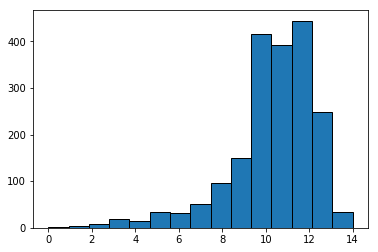

In [43]:
#Research for which rate is frequent
A=tweet_data.rating_numerator
NumOfBins=len(A.unique())

plt.hist(A,bins=NumOfBins,ec='black')
plt.show()

In [46]:
#Ratio of the rate 10/10, 11/10 and 12/10
total_count=tweet_data['tweet_id'].count()
count_10_12=tweet_data.query('rating_numerator in (10,11,12)')['tweet_id'].count()
count_10_12/total_count

0.6445131375579598

### Q2. Is there any relationship between dog’s rate and count of favorites?

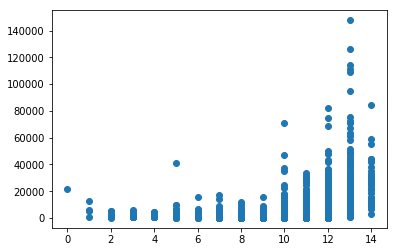

In [47]:
#Scatter plot for favorite count and dog's rate
y=tweet_data['favorite_count']
x=tweet_data['rating_numerator']
plt.scatter(x,y);

In [49]:
tweet_data['rating_numerator'].value_counts()

12    444
10    415
11    392
13    249
9     149
8      95
7      51
14     33
5      33
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Q3. Is a puppy (pupper / puppo) especially favored?

In [52]:
#data frame for tweets with dog stages
tweet_dog_stage=tweet_data[tweet_data['dog_stage'].notnull()]

In [54]:
tweet_dog_stage['dog_stage'].value_counts()

pupper     200
doggo       72
puppo       22
floofer      7
Name: dog_stage, dtype: int64

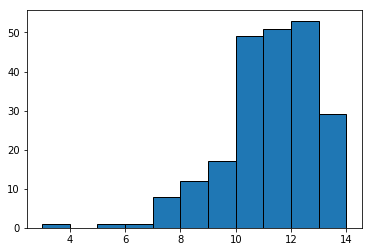

In [56]:
#Histogram of dog's rate for puppy
A=tweet_dog_stage.query('dog_stage in ["pupper","puppo"]')['rating_numerator']
NumOfBins=len(A.unique())

plt.hist(A,bins=NumOfBins,ec='black')
plt.show()

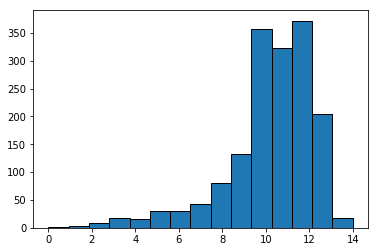

In [57]:
#Histogram of dog's rate for other than puppy
A=tweet_data[tweet_data['dog_stage'].isnull()]['rating_numerator']
NumOfBins=len(A.unique())

plt.hist(A,bins=NumOfBins,ec='black')
plt.show()